# K-Means and VQ
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Means clustering** algorithm
- play with the hyperparameter K 
- implement the Vector Quantization with K-Means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [2]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

Run your k-means algorithm on `kmeans_data.mat`. Note that the lines indicate the iterations of centroids.

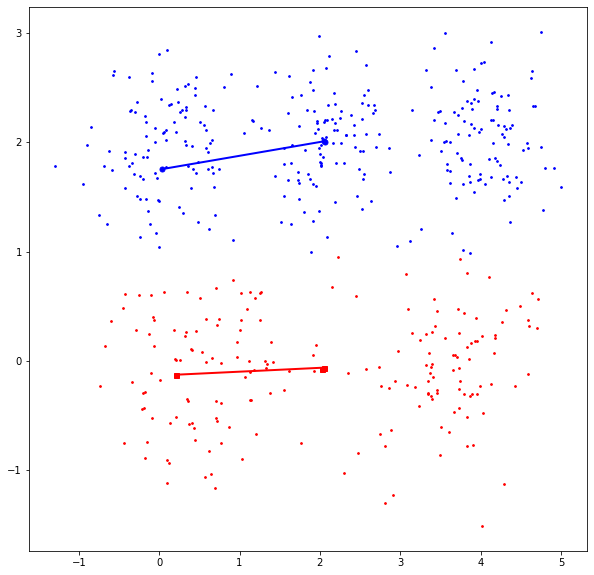

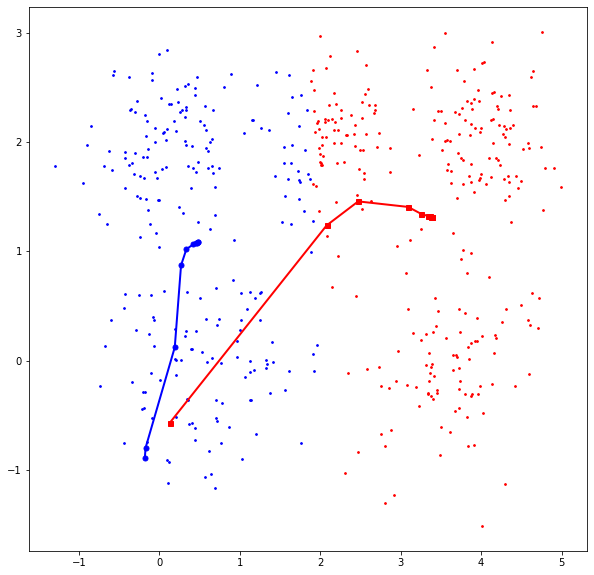

In [5]:
from kmeans import kmeans
from kmeans_plot import kmeans_plot
x = sio.loadmat('kmeans_data.mat')['X']
k = 2  # modify if you want

min_sd = float("inf")
min_idx = []
min_ctrs = []
min_iter_ctrs = []

max_sd = 0
max_idx = []
max_ctrs = []
max_iter_ctrs = []

for i in range(1000):
    idx, ctrs, iter_ctrs = kmeans(x, k)
    dist = [np.square(ctrs[idx[i], :] - x[i, :]) for i in range(x.shape[0])]
    sd = np.sum(dist)
    if sd < min_sd:
        min_sd = sd
        min_iter_ctrs = iter_ctrs
        min_ctrs = ctrs
        min_idx = idx
    if sd > max_sd:
        max_sd = sd
        max_iter_ctrs = iter_ctrs
        max_ctrs = ctrs
        max_idx = idx

kmeans_plot(x, max_idx, max_ctrs, max_iter_ctrs)
kmeans_plot(x, min_idx, min_ctrs, min_iter_ctrs)

Run your k-means algorithm on the digit dataset `digit_data.mat`. 

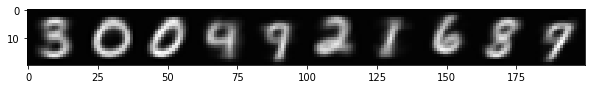

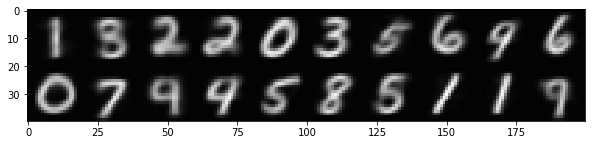

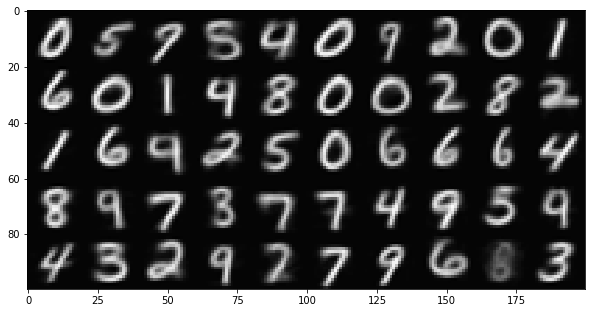

In [6]:
from show_digit import show_digit
x = sio.loadmat('digit_data.mat')['X']
for k in [10, 20, 50]:
    _, ctrs, _ = kmeans(x, k)
    show_digit(ctrs)

# Vector quantization
Compress images with K set to 8, 16, 32 and 64.

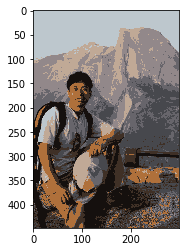

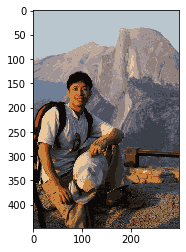

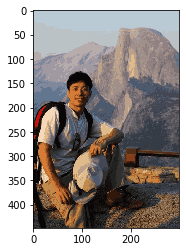

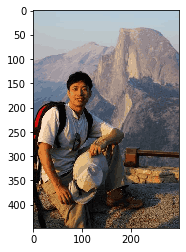

In [3]:
import kmeans
from matplotlib.pyplot import imread
img = imread('sample0.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
# YOUR (SEVERAL LINES) CODE HERE
# begin answer
for k in [8, 16, 32, 64]:
    temp = np.copy(fea)
    idx, ctrs, iter_ctrs = kmeans.kmeans(temp, k)
    for i in range(temp.shape[0]):
        temp[i, :] = ctrs[idx[i], :]
    plt.imshow(temp.reshape(img.shape).astype(np.uint8))
    plt.show()
# end answer